In [40]:
import numpy as np
import pyarrow
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

In [41]:
df = pd.read_csv('Course_info.csv', encoding = 'utf-8')
df.shape

(209734, 20)

In [42]:
df.head()

,id,title,is_paid,price,headline,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min,published_time,last_update_date,category,subcategory,topic,language,course_url,instructor_name,instructor_url
0,4715.0,Online Vegan Vegetarian Cooking School,True,24.99,Learn to cook delicious vegan recipes. Filmed ...,2231.0,3.75,134.0,42.0,37.0,1268.0,2010-08-05T22:06:13Z,2020-11-06,Lifestyle,Food & Beverage,Vegan Cooking,English,/course/vegan-vegetarian-cooking-school/,Angela Poch,/user/angelapoch/
1,1769.0,The Lean Startup Talk at Stanford E-Corner,False,0.00,Debunking Myths of Entrepreneurship A startup ...,26474.0,4.50,709.0,112.0,9.0,88.0,2010-01-12T18:09:46Z,NaN,Business,Entrepreneurship,Lean Startup,English,/course/the-lean-startup-debunking-myths-of-en...,Eric Ries,/user/ericries/
2,5664.0,"How To Become a Vegan, Vegetarian, or Flexitarian",True,19.99,Get the tools you need for a lifestyle change ...,1713.0,4.40,41.0,13.0,14.0,82.0,2010-10-13T18:07:17Z,2019-10-09,Lifestyle,Other Lifestyle,Vegan Cooking,English,/course/see-my-personal-motivation-for-becomin...,Angela Poch,/user/angelapoch/
3,7723.0,How to Train a Puppy,True,199.99,Train your puppy the right way with Dr. Ian Du...,4988.0,4.80,395.0,88.0,36.0,1511.0,2011-06-20T20:08:38Z,2016-01-13,Lifestyle,Pet Care & Training,Pet Training,English,/course/complete-dunbar-collection/,Ian Dunbar,/user/ian-dunbar/
4,8157.0,Web Design from the Ground Up,True,159.99,Learn web design online: Everything you need t...,1266.0,4.75,38.0,12.0,38.0,569.0,2011-06-23T18:31:20Z,NaN,Design,Web Design,Web Design,English,/course/web-design-from-the-ground-up/,E Learning Lab,/user/edwin-ang-2/


In [43]:
df.head(5)

,id,title,is_paid,price,headline,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min,published_time,last_update_date,category,subcategory,topic,language,course_url,instructor_name,instructor_url
0,4715.0,Online Vegan Vegetarian Cooking School,True,24.99,Learn to cook delicious vegan recipes. Filmed ...,2231.0,3.75,134.0,42.0,37.0,1268.0,2010-08-05T22:06:13Z,2020-11-06,Lifestyle,Food & Beverage,Vegan Cooking,English,/course/vegan-vegetarian-cooking-school/,Angela Poch,/user/angelapoch/
1,1769.0,The Lean Startup Talk at Stanford E-Corner,False,0.00,Debunking Myths of Entrepreneurship A startup ...,26474.0,4.50,709.0,112.0,9.0,88.0,2010-01-12T18:09:46Z,NaN,Business,Entrepreneurship,Lean Startup,English,/course/the-lean-startup-debunking-myths-of-en...,Eric Ries,/user/ericries/
2,5664.0,"How To Become a Vegan, Vegetarian, or Flexitarian",True,19.99,Get the tools you need for a lifestyle change ...,1713.0,4.40,41.0,13.0,14.0,82.0,2010-10-13T18:07:17Z,2019-10-09,Lifestyle,Other Lifestyle,Vegan Cooking,English,/course/see-my-personal-motivation-for-becomin...,Angela Poch,/user/angelapoch/
3,7723.0,How to Train a Puppy,True,199.99,Train your puppy the right way with Dr. Ian Du...,4988.0,4.80,395.0,88.0,36.0,1511.0,2011-06-20T20:08:38Z,2016-01-13,Lifestyle,Pet Care & Training,Pet Training,English,/course/complete-dunbar-collection/,Ian Dunbar,/user/ian-dunbar/
4,8157.0,Web Design from the Ground Up,True,159.99,Learn web design online: Everything you need t...,1266.0,4.75,38.0,12.0,38.0,569.0,2011-06-23T18:31:20Z,NaN,Design,Web Design,Web Design,English,/course/web-design-from-the-ground-up/,E Learning Lab,/user/edwin-ang-2/


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209734 entries, 0 to 209733
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  209734 non-null  float64
 1   title               209734 non-null  object 
 2   is_paid             209734 non-null  bool   
 3   price               209734 non-null  float64
 4   headline            209703 non-null  object 
 5   num_subscribers     209734 non-null  float64
 6   avg_rating          209734 non-null  float64
 7   num_reviews         209734 non-null  float64
 8   num_comments        209734 non-null  float64
 9   num_lectures        209734 non-null  float64
 10  content_length_min  209734 non-null  float64
 11  published_time      209734 non-null  object 
 12  last_update_date    209597 non-null  object 
 13  category            209734 non-null  object 
 14  subcategory         209734 non-null  object 
 15  topic               208776 non-nul

In [45]:
pd.isnull(df)

,id,title,is_paid,price,headline,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min,published_time,last_update_date,category,subcategory,topic,language,course_url,instructor_name,instructor_url
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209729,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
209730,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
209731,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
209732,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [46]:

pd.isnull(df).sum()

id                      0
title                   0
is_paid                 0
price                   0
headline               31
num_subscribers         0
avg_rating              0
num_reviews             0
num_comments            0
num_lectures            0
content_length_min      0
published_time          0
last_update_date      137
category                0
subcategory             0
topic                 958
language                0
course_url              0
instructor_name         5
instructor_url        427
dtype: int64

In [47]:
df.shape

(209734, 20)

In [48]:
df.fillna({'headline':df['headline'].mode()[0]},inplace=True)

In [49]:
df.fillna({'last_update_date':df['last_update_date'].mode()[0]},inplace=True)

In [50]:
df.isnull().sum()

id                      0
title                   0
is_paid                 0
price                   0
headline                0
num_subscribers         0
avg_rating              0
num_reviews             0
num_comments            0
num_lectures            0
content_length_min      0
published_time          0
last_update_date        0
category                0
subcategory             0
topic                 958
language                0
course_url              0
instructor_name         5
instructor_url        427
dtype: int64

In [51]:
df.dropna(inplace = True)

In [52]:
df.shape

(208353, 20)

In [53]:
pd.isnull(df).sum()

id                    0
title                 0
is_paid               0
price                 0
headline              0
num_subscribers       0
avg_rating            0
num_reviews           0
num_comments          0
num_lectures          0
content_length_min    0
published_time        0
last_update_date      0
category              0
subcategory           0
topic                 0
language              0
course_url            0
instructor_name       0
instructor_url        0
dtype: int64

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 208353 entries, 0 to 209733
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  208353 non-null  float64
 1   title               208353 non-null  object 
 2   is_paid             208353 non-null  bool   
 3   price               208353 non-null  float64
 4   headline            208353 non-null  object 
 5   num_subscribers     208353 non-null  float64
 6   avg_rating          208353 non-null  float64
 7   num_reviews         208353 non-null  float64
 8   num_comments        208353 non-null  float64
 9   num_lectures        208353 non-null  float64
 10  content_length_min  208353 non-null  float64
 11  published_time      208353 non-null  object 
 12  last_update_date    208353 non-null  object 
 13  category            208353 non-null  object 
 14  subcategory         208353 non-null  object 
 15  topic               208353 non-null  ob

In [55]:
df['avg_rating'] = df['avg_rating'].astype('int')

In [56]:
df['avg_rating'].dtypes

dtype('int32')

In [57]:
df['num_reviews'] = df['num_reviews'].astype('int')




In [58]:

df['price'] = df['price'].astype('int')


In [59]:
df[' num_comments'] = df['num_comments'].astype('int')


In [60]:
df['content_length_min'] = df['content_length_min'].astype('int')

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 208353 entries, 0 to 209733
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  208353 non-null  float64
 1   title               208353 non-null  object 
 2   is_paid             208353 non-null  bool   
 3   price               208353 non-null  int32  
 4   headline            208353 non-null  object 
 5   num_subscribers     208353 non-null  float64
 6   avg_rating          208353 non-null  int32  
 7   num_reviews         208353 non-null  int32  
 8   num_comments        208353 non-null  float64
 9   num_lectures        208353 non-null  float64
 10  content_length_min  208353 non-null  int32  
 11  published_time      208353 non-null  object 
 12  last_update_date    208353 non-null  object 
 13  category            208353 non-null  object 
 14  subcategory         208353 non-null  object 
 15  topic               208353 non-null  ob

In [62]:
df['num_subscribers'] = df['num_subscribers'].astype('int')

In [63]:
df['num_lectures'] = df['num_lectures'].astype('int')

In [64]:
df['num_comments']=df['num_comments'].astype('int')

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 208353 entries, 0 to 209733
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  208353 non-null  float64
 1   title               208353 non-null  object 
 2   is_paid             208353 non-null  bool   
 3   price               208353 non-null  int32  
 4   headline            208353 non-null  object 
 5   num_subscribers     208353 non-null  int32  
 6   avg_rating          208353 non-null  int32  
 7   num_reviews         208353 non-null  int32  
 8   num_comments        208353 non-null  int32  
 9   num_lectures        208353 non-null  int32  
 10  content_length_min  208353 non-null  int32  
 11  published_time      208353 non-null  object 
 12  last_update_date    208353 non-null  object 
 13  category            208353 non-null  object 
 14  subcategory         208353 non-null  object 
 15  topic               208353 non-null  ob

In [66]:
df['num_comments']=df['num_comments'].astype('int')

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 208353 entries, 0 to 209733
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  208353 non-null  float64
 1   title               208353 non-null  object 
 2   is_paid             208353 non-null  bool   
 3   price               208353 non-null  int32  
 4   headline            208353 non-null  object 
 5   num_subscribers     208353 non-null  int32  
 6   avg_rating          208353 non-null  int32  
 7   num_reviews         208353 non-null  int32  
 8   num_comments        208353 non-null  int32  
 9   num_lectures        208353 non-null  int32  
 10  content_length_min  208353 non-null  int32  
 11  published_time      208353 non-null  object 
 12  last_update_date    208353 non-null  object 
 13  category            208353 non-null  object 
 14  subcategory         208353 non-null  object 
 15  topic               208353 non-null  ob

In [68]:
df.columns

Index(['id', 'title', 'is_paid', 'price', 'headline', 'num_subscribers',
       'avg_rating', 'num_reviews', 'num_comments', 'num_lectures',
       'content_length_min', 'published_time', 'last_update_date', 'category',
       'subcategory', 'topic', 'language', 'course_url', 'instructor_name',
       'instructor_url', ' num_comments'],
      dtype='object')

In [69]:
df.describe()

,id,price,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min,num_comments
count,2.083530e+05,208353.000000,2.083530e+05,208353.000000,208353.000000,208353.000000,208353.000000,208353.000000,208353.000000
mean,3.011370e+06,80.936214,3.107841e+03,3.356093,245.383383,45.072440,36.638824,266.203952,45.072440
std,1.342435e+06,117.307138,1.562538e+04,1.401962,2465.421812,356.870537,51.938597,455.199239,356.870537
min,1.769000e+03,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.946310e+06,19.000000,2.600000e+01,3.000000,3.000000,1.000000,11.000000,69.000000,1.000000
50%,3.284928e+06,34.000000,2.070000e+02,4.000000,17.000000,5.000000,22.000000,133.000000,5.000000
75%,4.184294e+06,99.000000,1.442000e+03,4.000000,75.000000,18.000000,42.000000,290.000000,18.000000
max,4.914146e+06,999.000000,1.752364e+06,5.000000,436457.000000,39040.000000,1095.000000,22570.000000,39040.000000


In [70]:
df[['price','avg_rating','num_reviews','num_comments']].describe()

,price,avg_rating,num_reviews,num_comments
count,208353.000000,208353.000000,208353.000000,208353.000000
mean,80.936214,3.356093,245.383383,45.072440
std,117.307138,1.401962,2465.421812,356.870537
min,0.000000,0.000000,0.000000,0.000000
25%,19.000000,3.000000,3.000000,1.000000
50%,34.000000,4.000000,17.000000,5.000000
75%,99.000000,4.000000,75.000000,18.000000
max,999.000000,5.000000,436457.000000,39040.000000


# **EXPLORATORY DATA ANALYSIS **:

In [71]:
df.columns

Index(['id', 'title', 'is_paid', 'price', 'headline', 'num_subscribers',
       'avg_rating', 'num_reviews', 'num_comments', 'num_lectures',
       'content_length_min', 'published_time', 'last_update_date', 'category',
       'subcategory', 'topic', 'language', 'course_url', 'instructor_name',
       'instructor_url', ' num_comments'],
      dtype='object')

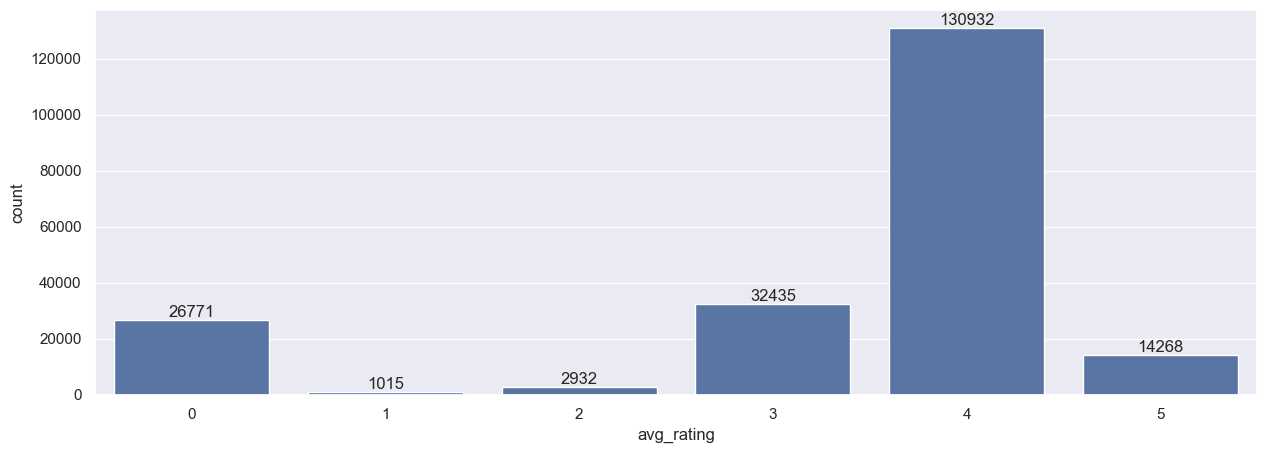

In [72]:
ax = sns.countplot(x ='avg_rating',data =df)

for bars in ax.containers:
    ax.bar_label(bars)
    

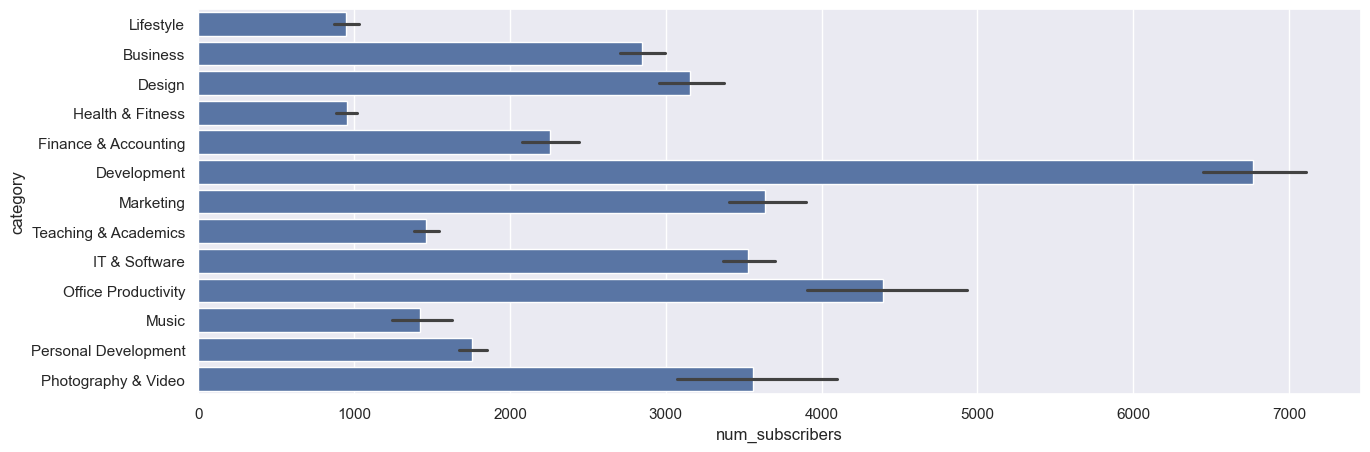

In [73]:
sns.barplot(data=df ,x = 'num_subscribers' , y='category')
sns.set(rc={'figure.figsize':(15,5)})
for bars in ax.containers:
    ax.bar_label(bars)

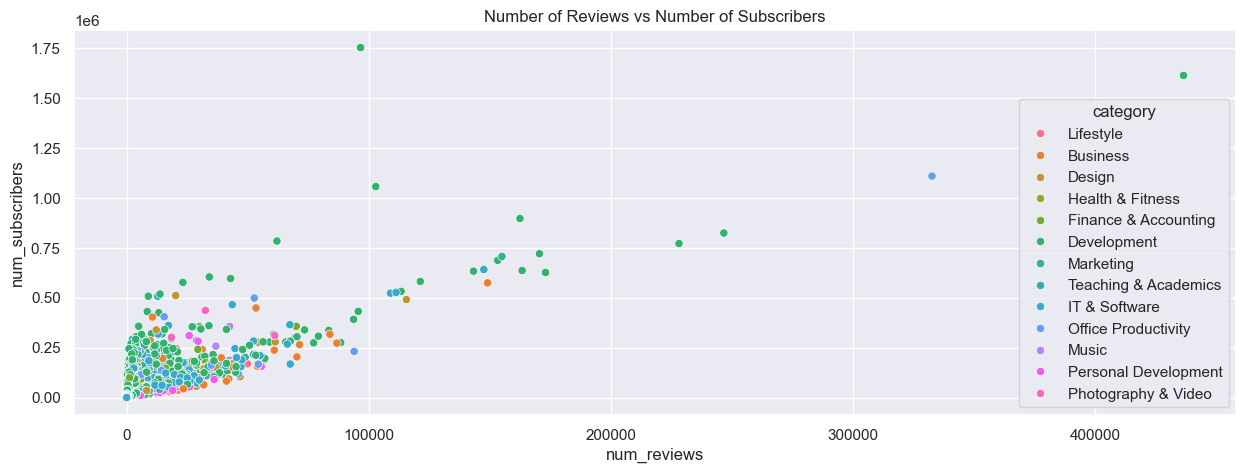

In [74]:
for bars in ax.containers:
    sns.scatterplot(data=df, x='num_reviews', y='num_subscribers', hue='category')
    plt.title('Number of Reviews vs Number of Subscribers')

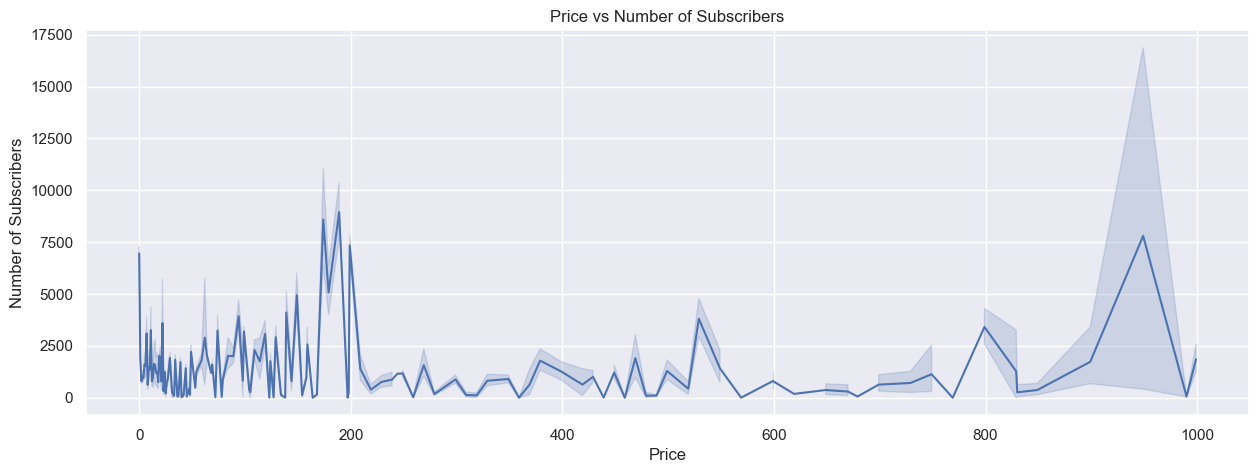

In [75]:

sns.lineplot(data=df, x='price', y='num_subscribers')
plt.xlabel('Price')
plt.ylabel('Number of Subscribers')
plt.title('Price vs Number of Subscribers')
plt.show()


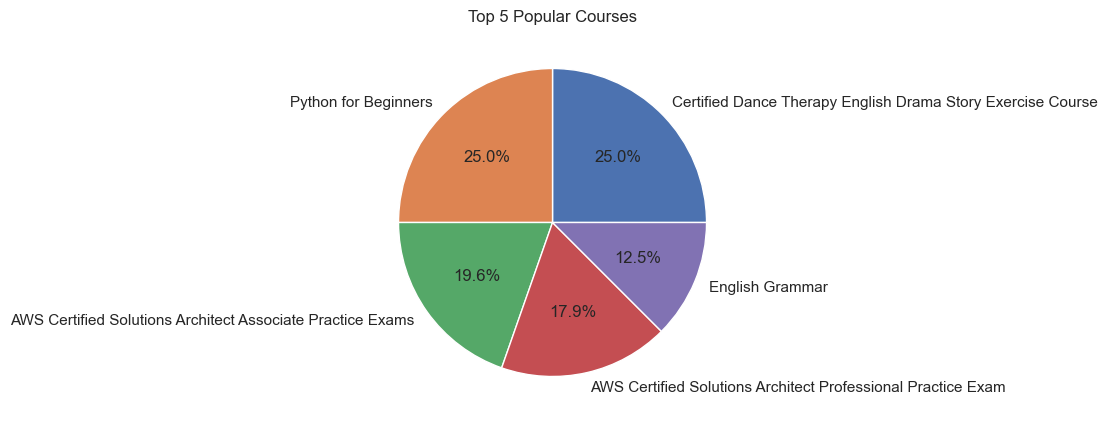

In [76]:
top_5_courses = df['title'].value_counts().head(5)
plt.pie(top_5_courses, labels=top_5_courses.index, autopct='%1.1f%%')
plt.title('Top 5 Popular Courses')
plt.show()

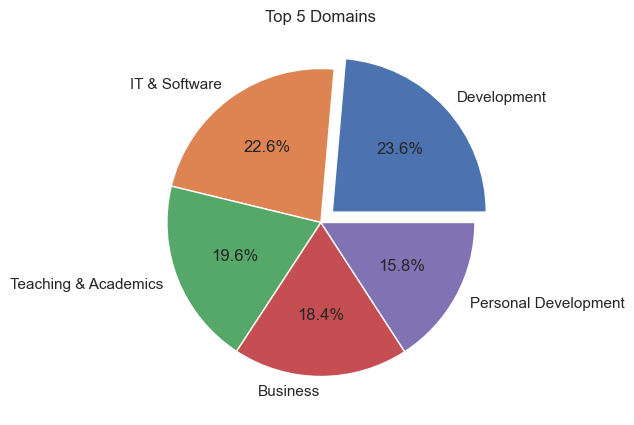

In [77]:

# Get the top domains and their counts
top_domains = df['category'].value_counts().head(5)

# Define the explode values for the pie slices
explode = (0.1, 0, 0, 0, 0)

# Create the pie chart with explosion style
plt.pie(top_domains, labels=top_domains.index, explode=explode, autopct='%1.1f%%')

# Add a title to the pie chart
plt.title('Top 5 Domains')

# Display the pie chart
plt.show()


In [78]:
df.head()

,id,title,is_paid,price,headline,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,...,published_time,last_update_date,category,subcategory,topic,language,course_url,instructor_name,instructor_url,num_comments
0,4715.0,Online Vegan Vegetarian Cooking School,True,24,Learn to cook delicious vegan recipes. Filmed ...,2231,3,134,42,37,...,2010-08-05T22:06:13Z,2020-11-06,Lifestyle,Food & Beverage,Vegan Cooking,English,/course/vegan-vegetarian-cooking-school/,Angela Poch,/user/angelapoch/,42
1,1769.0,The Lean Startup Talk at Stanford E-Corner,False,0,Debunking Myths of Entrepreneurship A startup ...,26474,4,709,112,9,...,2010-01-12T18:09:46Z,2022-10-03,Business,Entrepreneurship,Lean Startup,English,/course/the-lean-startup-debunking-myths-of-en...,Eric Ries,/user/ericries/,112
2,5664.0,"How To Become a Vegan, Vegetarian, or Flexitarian",True,19,Get the tools you need for a lifestyle change ...,1713,4,41,13,14,...,2010-10-13T18:07:17Z,2019-10-09,Lifestyle,Other Lifestyle,Vegan Cooking,English,/course/see-my-personal-motivation-for-becomin...,Angela Poch,/user/angelapoch/,13
3,7723.0,How to Train a Puppy,True,199,Train your puppy the right way with Dr. Ian Du...,4988,4,395,88,36,...,2011-06-20T20:08:38Z,2016-01-13,Lifestyle,Pet Care & Training,Pet Training,English,/course/complete-dunbar-collection/,Ian Dunbar,/user/ian-dunbar/,88
4,8157.0,Web Design from the Ground Up,True,159,Learn web design online: Everything you need t...,1266,4,38,12,38,...,2011-06-23T18:31:20Z,2022-10-03,Design,Web Design,Web Design,English,/course/web-design-from-the-ground-up/,E Learning Lab,/user/edwin-ang-2/,12
